# NAME - PARIKSHIT SAHU
## LETSGOREMORE INTERSHIP PROJECT
### ADVANCED LEVEL


#### THE AIM OF THIS PROJECT IS TO DEVLOP A NEURAL NETWORK THAT CAN READ HANDWRITING

#### IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### DOWNLOADING OF DATA FROM MNIST DATABASE

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 17s 1us/step


#### PLOTTING THE GRAPH FROM THE DATA

<Axes: ylabel='count'>

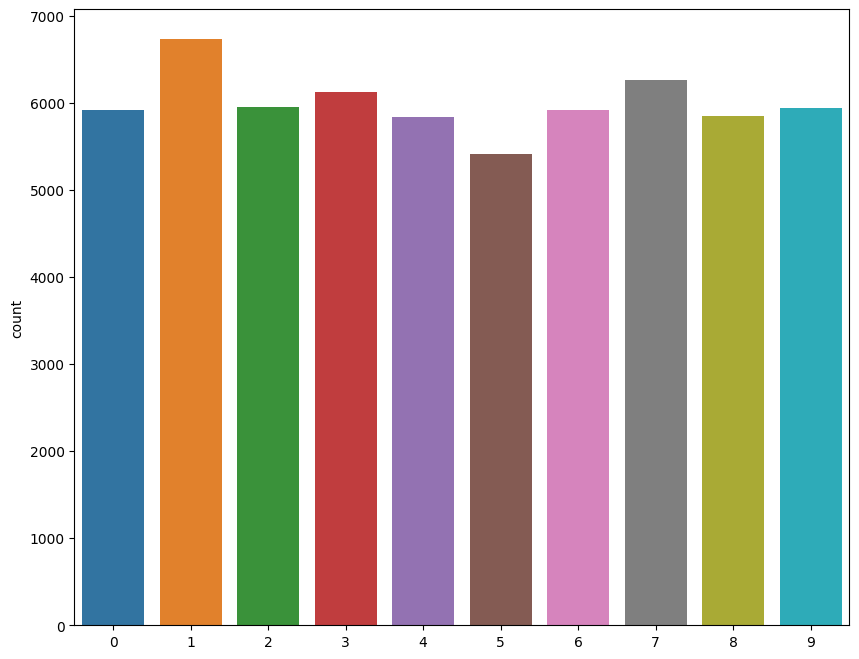

In [4]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

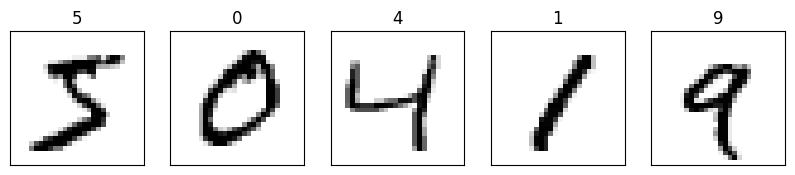

In [5]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

#### PREPROCESSING THE DATA AND TRAINING THE MODEL

In [7]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
x_train = x_train/255.0
x_testg = x_test/255.0
num_classes = 10

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 305s 180ms/step - loss: 0.2632 - accuracy: 0.9239 - val_loss: 0.0801 - val_accuracy: 0.9808
Epoch 2/10
1688/1688 [==============================] - 310s 183ms/step - loss: 0.1111 - accuracy: 0.9679 - val_loss: 0.0767 - val_accuracy: 0.9848
Epoch 3/10
1688/1688 [==============================] - 286s 170ms/step - loss: 0.0885 - accuracy: 0.9741 - val_loss: 0.1187 - val_accuracy: 0.9783
Epoch 4/10
1688/1688 [==============================] - 307s 182ms/step - loss: 0.0775 - accuracy: 0.9773 - val_loss: 0.0952 - val_accuracy: 0.9840
Epoch 5/10
1688/1688 [==============================] - 312s 185ms/step - loss: 0.0628 - accuracy: 0.9816 - val_loss: 0.1062 - val_accuracy: 0.9848
Epoch 6/10
1688/1688 [==============================] - 335s 198ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0754 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 427s 253ms/step - loss: 0.0546 - accuracy: 0.9840 - val_

In [15]:
model.save('my_model.keras')
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

In [16]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 9s 27ms/step - loss: 2.3051 - accuracy: 0.9881
Test Loss 2.3050715923309326
Test Accuracy 0.988099992275238


#### TRAINING THE MODEL

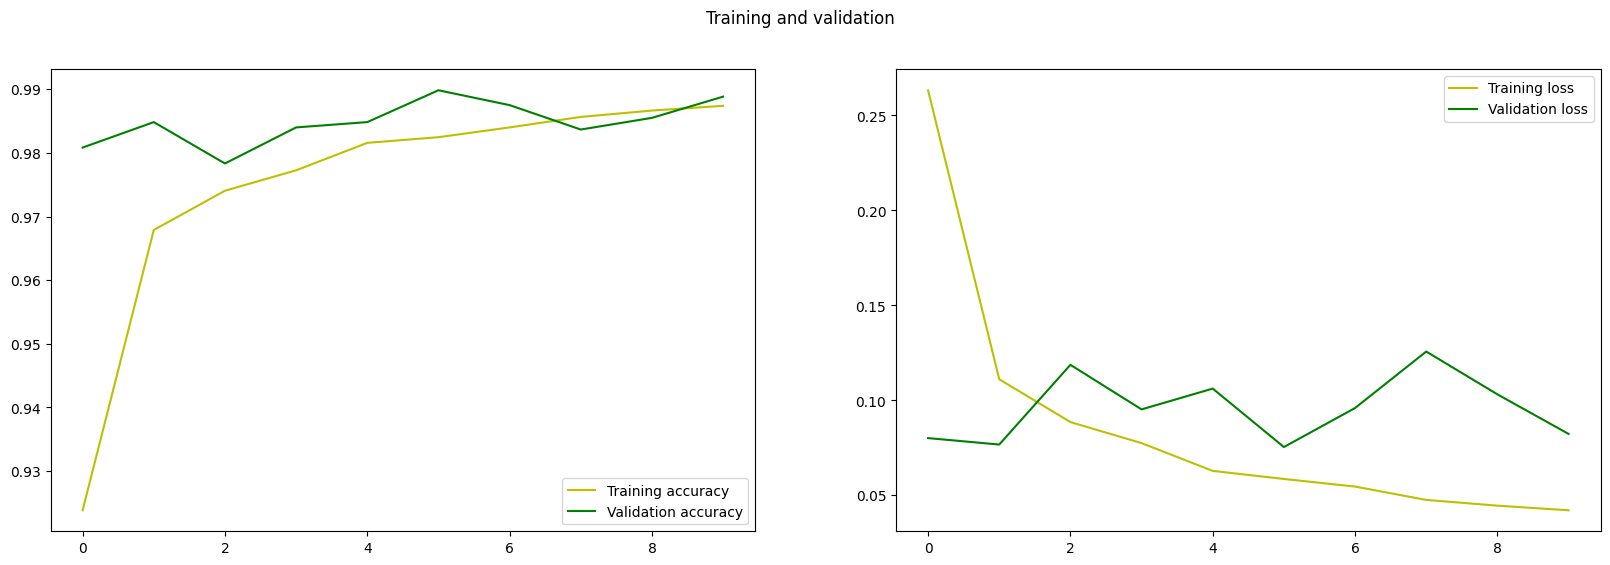

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [18]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 9s 27ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    4,    0,    2,    0,    3,    1,    1,    0],
       [   0, 1132,    0,    0,    0,    0,    2,    0,    1,    0],
       [   0,    0, 1029,    0,    1,    0,    0,    1,    1,    0],
       [   0,    0,    3, 1003,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    2,    1],
       [   0,    0,    0,    4,    0,  874,   12,    0,    2,    0],
       [   3,    2,    0,    1,    3,    2,  942,    0,    5,    0],
       [   0,    1,   10,    2,    0,    0,    0, 1012,    1,    2],
       [   0,    0,    1,    0,    0,    0,    0,    0,  972,    1],
       [   1,    0,    2,    2,   28,    0,    0,    0,    7,  969]])>

Text(95.72222222222221, 0.5, 'Truth')

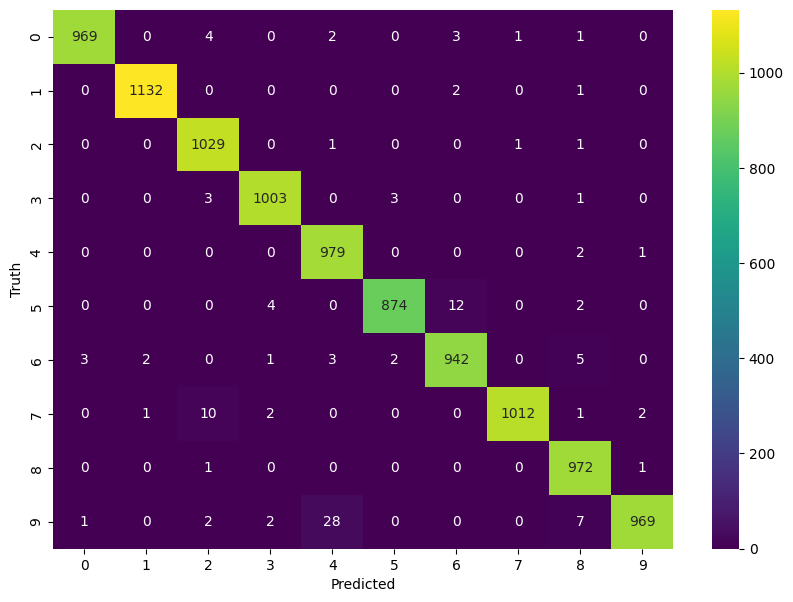

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### TESTING THE MODEL

313/313 [==============================] - 8s 26ms/step
Predicted Value:  0
Successful prediction


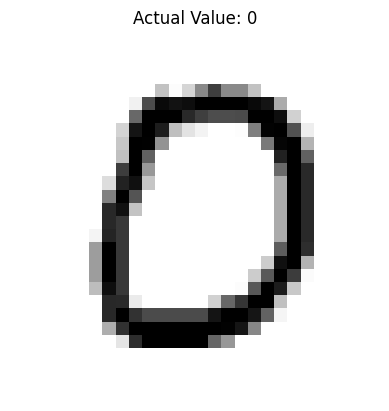

In [29]:
plt.imshow(x_test[10],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[10]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[10]))
if(y_test[10]==(np.argmax(prediction[10]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 9s 28ms/step
Predicted Value:  9
Successful prediction


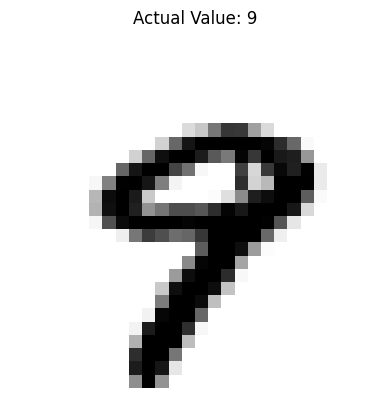

In [30]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')